#  Beyond Unsupervised Clustering: Dimensionality Reduction and Quantitative Analysis

**Author:** Shingo Nakazawa([@shnakazawa](https://twitter.com/shnakazawa))

**Objective:** This tutorial notebook introduces unsupervised clustering and subsequent analysis using Python. [[Reference article (Japanese)](https://zenn.dev/aidemy/articles/f1d3ba3c98b708)]

While clustering is often introduced as a typical example of unsupervised learning, there is little information on subsequent processes, such as visualization, analysis, and interpretation of the results.

**The objective of this tutorial is to fill the gap between a typical tutorial and real-world data analysis** by using the pitching standings of 2022 Japan Professional Baseball.

## Dataset

From [Baseball Reference](https://www.baseball-reference.com/), "2022 Team Pitching" data of 12 teams were obtained.
- [6 teams from Japan Central League](https://www.baseball-reference.com/register/league.cgi?code=JPCL&class=Fgn)
- [6 teams from Japan Pacific League](https://www.baseball-reference.com/register/league.cgi?code=JPPL&class=Fgn)

CSV files were saved and put under `data` folder as below.

```zsh
.
├── This notebook
└── data/
    ├── ChibaLotteMarines.csv
    ├── ChunichiDragons.csv
    ├── FukuokaSoftbankHawks.csv
    ├── HanshinTigers.csv
    ├── HiroshimaCarp.csv
    ├── HokkaidoNipponHamFighters.csv
    ├── OrixBuffaloes.csv
    ├── SaitamaSeibuLions.csv
    ├── TohokuRakutenGoldenEagles.csv
    ├── YakultSwallows.csv
    ├── YokohamaBayStars.csv
    └── YomiuriGiants.csv
```

## Preprocessing

### Concatenating data

With adding Team names.

In [1]:
import pandas as pd
from pathlib import Path

teams = Path('data').rglob('*.csv')
for i, team in enumerate(teams):
    if i == 0:
        df = pd.read_csv(team)
        df['Team'] = team.stem
    else:
        df_tmp = pd.read_csv(team)
        df_tmp['Team'] = team.stem
        df = pd.concat([df, df_tmp], axis = 0)
df

,Rk,Name,Age,W,L,W-L%,ERA,G,GS,GF,...,BF,WHIP,H9,HR9,BB9,SO9,SO/W,Notes,Name-additional,Team
0,1,Shota Abe,29,1,0,1.000,0.61,44,NaN,NaN,...,166,0.727,4.5,0.2,2.0,8.6,4.20,NaN,player.fcgi?id=abe---000sho,OrixBuffaloes
1,2,Kohei Azuma,22,1,0,1.000,4.85,4,NaN,NaN,...,60,1.692,11.8,0.7,3.5,4.8,1.40,NaN,player.fcgi?id=azuma-000koh,OrixBuffaloes
2,3,Jesse Biddle*,30,4,5,0.444,4.02,35,NaN,NaN,...,184,1.388,8.0,0.9,4.5,10.0,2.25,NaN,player.fcgi?id=biddle001jes,OrixBuffaloes
3,4,Yaku Cho,28,0,0,NaN,2.38,15,NaN,NaN,...,101,1.456,9.1,0.0,4.0,7.9,2.00,NaN,player.fcgi?id=cho---000yak,OrixBuffaloes
4,5,Motoki Higa,39,5,0,1.000,2.53,30,NaN,NaN,...,85,1.031,8.4,0.4,0.8,10.1,12.00,NaN,player.fcgi?id=higa--001mot,OrixBuffaloes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,27,Thyago Vieira,28,0,2,0.000,9.82,9,NaN,NaN,...,39,2.318,11.0,3.7,9.8,9.8,1.00,NaN,player.fcgi?id=vieira000thy,YomiuriGiants
27,28,Shun Yamaguchi,34,0,0,NaN,0.00,1,NaN,NaN,...,8,1.000,0.0,0.0,9.0,18.0,2.00,NaN,player.fcgi?id=yamagu001shu,YomiuriGiants
28,29,Itsuki Yamamoto*,24,0,0,NaN,0.00,2,NaN,NaN,...,10,1.500,9.0,0.0,4.5,0.0,0.00,NaN,player.fcgi?id=yamamo000its,YomiuriGiants
29,30,Iori Yamasaki,23,5,5,0.500,3.14,20,NaN,NaN,...,410,1.182,8.8,0.6,1.8,5.1,2.75,NaN,player.fcgi?id=yamasa000ior,YomiuriGiants


### Missing-value handling

Looking at the data, we can find the missing values.

- `'W-L%'`, `'SO/W'` values are missing for some pitchers
- No records at all for `'GS'` and `'GF'`
- Most values of Iwasaki of Dragons are missing

The treatment of missing values is also a profound topic, but since it is not the main focus of this tutorial, these columns/records are just removed.

Additionally, `'Rk'`, `'Notes'`, and `'Name-additional'` are supplementary information, so they are removed.

In [2]:
df_tmp = df[df['Name'] != 'Sho Iwasaki']
df_dropped = df_tmp.drop(['Rk','W-L%', 'GS', 'GF', 'SO/W', 'Notes', 'Name-additional'], axis=1)
df_dropped

,Name,Age,W,L,ERA,G,CG,SHO,SV,IP,...,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,Team
0,Shota Abe,29,1,0,0.61,44,0,0,3,44.0,...,2,0,0,166,0.727,4.5,0.2,2.0,8.6,OrixBuffaloes
1,Kohei Azuma,22,1,0,4.85,4,0,0,0,13.0,...,1,0,0,60,1.692,11.8,0.7,3.5,4.8,OrixBuffaloes
2,Jesse Biddle*,30,4,5,4.02,35,0,0,0,40.1,...,7,0,2,184,1.388,8.0,0.9,4.5,10.0,OrixBuffaloes
3,Yaku Cho,28,0,0,2.38,15,0,0,0,22.2,...,2,0,0,101,1.456,9.1,0.0,4.0,7.9,OrixBuffaloes
4,Motoki Higa,39,5,0,2.53,30,0,0,1,21.1,...,2,0,0,85,1.031,8.4,0.4,0.8,10.1,OrixBuffaloes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Thyago Vieira,28,0,2,9.82,9,0,0,0,7.1,...,1,0,0,39,2.318,11.0,3.7,9.8,9.8,YomiuriGiants
27,Shun Yamaguchi,34,0,0,0.00,1,0,0,0,2.0,...,0,0,0,8,1.000,0.0,0.0,9.0,18.0,YomiuriGiants
28,Itsuki Yamamoto*,24,0,0,0.00,2,0,0,0,2.0,...,0,0,0,10,1.500,9.0,0.0,4.5,0.0,YomiuriGiants
29,Iori Yamasaki,23,5,5,3.14,20,0,0,0,97.1,...,9,0,0,410,1.182,8.8,0.6,1.8,5.1,YomiuriGiants


### Separating explanatory variables and player/team names

Since player and team names are unnecessary information for clustering, let's create a new data frame without them.

In [3]:
df_features = df_dropped.drop(['Name', 'Team'], axis=1)

#### (Appendix) Simple EDA

In [4]:
# import pandas_profiling as pdp
# data_profile = pdp.ProfileReport(df_features)
# data_profile.to_file('EDA.html')

### Regularization

In order to treat all explanatory variables equally, regularization (normalizing to a minimum of 0 and a maximum of 1) is applied. This process affects the results of the subsequent dimensionality reduction.

In [5]:
from sklearn import preprocessing
mm = preprocessing.MinMaxScaler()
df_features_mm = pd.DataFrame(mm.fit_transform(df_features), columns=df_features.columns)
df_features_mm

,Age,W,L,ERA,G,CG,SHO,SV,IP,H,...,SO,HBP,BK,WP,BF,WHIP,H9,HR9,BB9,SO9
0,0.44,0.066667,0.000000,0.018074,0.614286,0.0,0.0,0.076923,0.227178,0.112821,...,0.204878,0.181818,0.0,0.00,0.214192,0.121167,0.100000,0.022222,0.148148,0.477778
1,0.16,0.066667,0.000000,0.143704,0.042857,0.0,0.0,0.000000,0.066390,0.087179,...,0.034146,0.090909,0.0,0.00,0.074901,0.282000,0.262222,0.077778,0.259259,0.266667
2,0.48,0.266667,0.416667,0.119111,0.485714,0.0,0.0,0.000000,0.206950,0.184615,...,0.219512,0.636364,0.0,0.25,0.237845,0.231333,0.177778,0.100000,0.333333,0.555556
3,0.40,0.000000,0.000000,0.070519,0.200000,0.0,0.0,0.000000,0.114108,0.117949,...,0.097561,0.181818,0.0,0.00,0.128778,0.242667,0.202222,0.000000,0.296296,0.438889
4,0.84,0.333333,0.000000,0.074963,0.414286,0.0,0.0,0.025641,0.108402,0.102564,...,0.117073,0.181818,0.0,0.00,0.107753,0.171833,0.186667,0.044444,0.059259,0.561111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0.40,0.000000,0.166667,0.290963,0.114286,0.0,0.0,0.000000,0.035788,0.046154,...,0.039024,0.090909,0.0,0.00,0.047306,0.386333,0.244444,0.411111,0.725926,0.544444
349,0.64,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.009336,0.000000,...,0.019512,0.000000,0.0,0.00,0.006570,0.166667,0.000000,0.000000,0.666667,1.000000
350,0.24,0.000000,0.000000,0.000000,0.014286,0.0,0.0,0.000000,0.009336,0.010256,...,0.000000,0.000000,0.0,0.00,0.009198,0.250000,0.200000,0.000000,0.333333,0.000000
351,0.20,0.333333,0.416667,0.093037,0.271429,0.0,0.0,0.000000,0.502593,0.487179,...,0.268293,0.818182,0.0,0.00,0.534823,0.197000,0.195556,0.066667,0.133333,0.283333


## Unsupervised clustering

Here, **k-means**, a typical clustering method used in tutorials, are used, and **the number of clusters is set to 8**. (How to choose clustering methods and num of clusters are out of focus of this tutorial.)

Tip: The dimensionality reduction described later can be applied prior to clustering, especially if the data dimensionality is large (or, I would say, that is the standard). Please consider doing so when the computation time is very long or clustering does not work well.

In [6]:
from sklearn.cluster import KMeans

k = 8 # num of clusters

kmeanModel = KMeans(n_clusters=k, random_state=42)
kmeanModel.fit(df_features_mm)
clusters = kmeanModel.labels_

# How many samples in each cluster?
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 24
Cluster 1: n = 11
Cluster 2: n = 15
Cluster 3: n = 35
Cluster 4: n = 36
Cluster 5: n = 76
Cluster 6: n = 61
Cluster 7: n = 95


354 pitchers are classified into 8 clusters.

## Visualization of clustering results

**From here is the main part of this tutorial!**

First, **let's visualize the clustering result**.

### Making a plot with two variables

In many tutorials, the result is plotted on the image with two explanatory variables. Because the data dimensionality is small, we can see clusters on the plot even in this way.

Let's do the same with the current data. For now, the number of game appearances and wins are recruited as x-/y-axes.

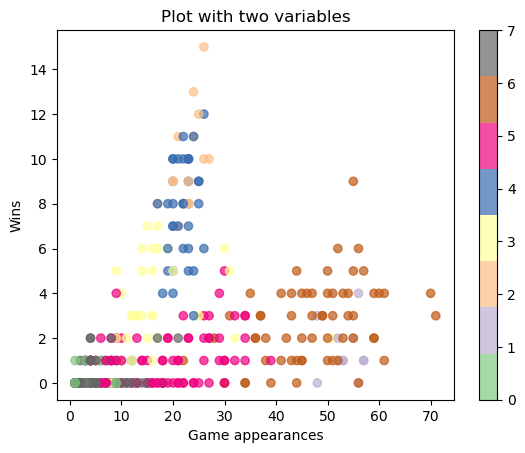

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'Hiragino Sans' # To enable to use Japanese font. For Mac users.
# mpl.rcParams['font.family'] = 'MS Gothic' # For Windows users.

plt.scatter(df_features['G'], df_features['W'],
            c=clusters, cmap='Accent', alpha=0.7) 
plt.title('Plot with two variables')
plt.xlabel('Game appearances')
plt.ylabel('Wins')
plt.colorbar()
plt.show()

OK, so... what information can we obtain?

We can find like

- Brown and purple have more game appearances
- Blue and orange have a lot of wins
- But their difference can't be seen...
- **Want to visualize the data with another set of variables!**

That's right. However, it is not practical to create plots with all combinations of the variables. (You can calculate how many images you will get.)

So, what approach can we take? One idea is **"to represent more information on a single plot."**

**Dimensionality reduction** can be used for this purpose. It is used for various purposes, but in the context of visualization, it can reduce multidimensional data into two dimensions and extract **two axes that best represent the characteristics of the data**; in other words, it can create the two axes **that are (considered to be) the best separation of data when plotted on a plane.**

### PCA

Let's first use **principal component analysis (PCA)**, a representative dimensionality reduction method.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(df_features_mm)
score = pd.DataFrame(pca.transform(df_features_mm), index=df_features.index)
score

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.195609,0.584565,0.174985,-0.093934,0.013688,-0.079958,-0.015417,-0.131912,-0.023364,-0.026868,...,0.031440,0.047120,-0.082873,-0.025082,-0.055983,-0.014847,-0.010162,-0.022129,-0.003172,-0.000615
1,-0.491934,-0.105560,0.149118,0.125889,-0.123350,-0.192570,-0.005019,-0.012376,0.014771,-0.034520,...,-0.005736,-0.019862,0.027827,0.020103,0.004963,0.003513,0.001753,0.004491,0.000831,0.000914
2,0.281702,0.221630,-0.186703,0.103387,0.023735,0.124982,0.054722,-0.213727,-0.140148,-0.106472,...,-0.117727,0.014791,0.071205,-0.033489,0.035544,0.028942,0.009358,0.008456,-0.003160,0.000099
3,-0.419589,-0.043730,0.008067,-0.036998,0.143011,0.015065,-0.000666,-0.159947,-0.097165,-0.037232,...,0.056072,0.022683,-0.022765,0.029147,-0.015606,-0.000457,-0.004678,0.015194,-0.001387,-0.000095
4,-0.304276,0.170842,0.035616,-0.506405,0.172583,0.189182,0.068557,-0.228543,-0.085930,-0.040151,...,-0.108562,-0.072344,0.065093,0.013059,0.023427,0.018924,0.010839,0.017617,0.002291,-0.000989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,-0.502134,-0.246944,-0.091692,0.164768,-0.109046,0.336399,-0.216014,-0.005567,-0.052138,-0.007985,...,-0.001019,-0.013729,-0.052506,0.064464,0.008771,0.002734,-0.003472,-0.001775,0.000663,-0.000996
27,-0.715593,-0.022343,0.062850,-0.079928,0.211624,0.561079,-0.049000,-0.382035,0.173227,-0.170556,...,-0.125367,-0.102770,-0.051850,0.093568,0.002186,-0.039406,0.000860,-0.004764,0.000752,-0.000039
28,-0.720768,-0.234278,0.108796,-0.021215,0.012818,-0.291871,0.111001,0.009120,-0.151343,0.125648,...,-0.056327,0.072948,-0.000185,0.017160,0.023515,0.054898,-0.002578,0.006268,-0.000825,-0.000134
29,0.749011,-0.081121,-0.128998,0.136326,-0.060840,-0.348814,-0.098545,-0.269837,-0.215294,-0.210280,...,-0.077426,-0.051002,-0.068222,0.095375,-0.050944,-0.033751,-0.006033,-0.033834,-0.006878,-0.000503


The first principal component (principal component 1: PC1) and the second principal component (PC2) are set as the horizontal and vertical axes, respectively.

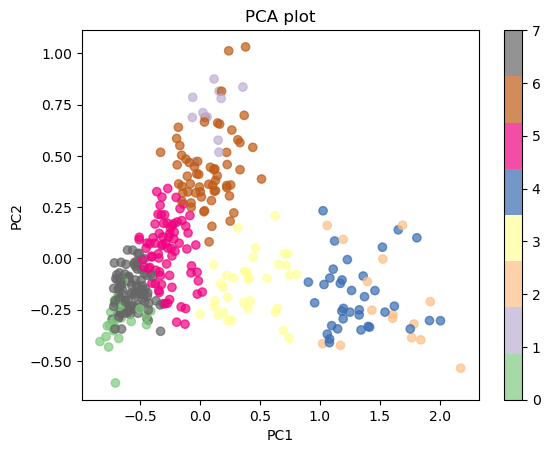

In [9]:
plt.scatter(score.iloc[:,0], score.iloc[:,1],
            c=clusters, cmap='Accent', alpha=0.7) 
plt.title('PCA plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

The clusters were better separated than before! However, some clusters, e.g., clusters 2 (orange) and 4 (blue), are still overlapped.

By examining how the explanatory variables contribute to each PC, we could discuss what properties each cluster has, but let's try other approaches to separate the clusters better.

### t-SNE

Next, we introduce a non-linear dimensionality reduction method: **t-SNE** (t-Distributed Stochastic Neighbor Embedding).

Because it is a non-linear method, it cannot be used if the linear relationship among the original explanatory variables needs to be kept. However, in many cases, **tSNE shows better results than PCA at reducing the relationship among data to a lower dimension**.

/Users/p160/miniforge3/envs/adventcalendar2022/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/p160/miniforge3/envs/adventcalendar2022/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


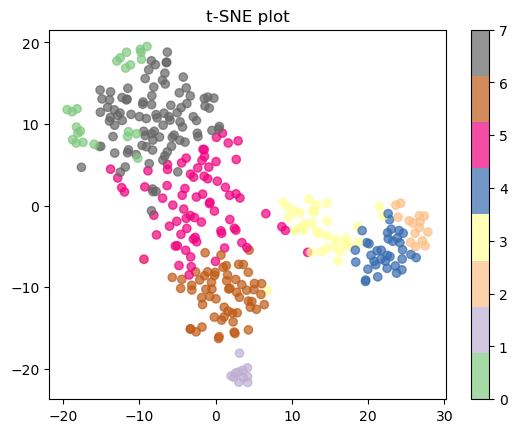

In [10]:
from sklearn.manifold import TSNE
embedding = TSNE(random_state=42).fit_transform(df_features_mm)
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='Accent', alpha=0.7)
plt.title('t-SNE plot')
plt.colorbar()
plt.show()

The separation of the clusters was more apparent than that in the PCA!

### UMAP

Let's try another method called UMAP.

Like t-SNE, UMAP is also a non-linear dimensionality reduction method, but it is said that **UMAP is faster and features more agglomerations of similar data**. (While, it is not that simple. A lot of debates are ongoing. [Reference 1](https://arxiv.org/abs/2206.01816), [Reference 2](https://www.nature.com/articles/s41587-020-00809-z))

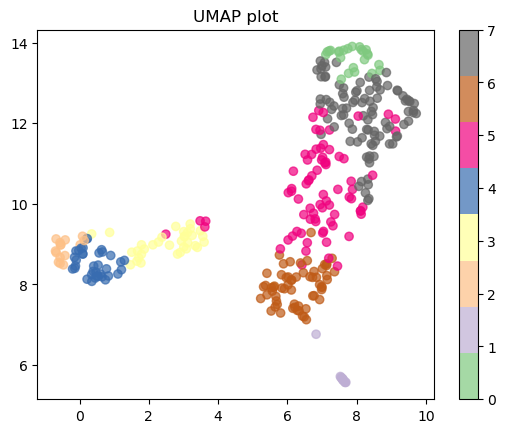

In [11]:
import umap
mapper = umap.UMAP(random_state=42)
embedding = mapper.fit_transform(df_features_mm)
plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='Accent', alpha=0.7)
plt.title('UMAP plot')
plt.colorbar()
plt.show()

For the current data, UMAP represents the clusters better than t-SNE. (Just my feeling.)

#### (Appendix) Parameter settings for t-SNE and UMAP

Note that no parameter tunings have been done in this tutorial, but their settings dramatically impact the reduction results. Interactive tutorials on how data dots behave when the parameters have been changed are available.

- [t-SNE: How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)
- [UMAP: Understanding UMAP](https://pair-code.github.io/understanding-umap/)

The latter site also offers important suggestions for data interpretation, especially the following two.

> 2. Cluster sizes in a UMAP plot mean nothing
> 3. Distances between clusters might not mean anything

We must pay attention to how to interpret the outputs from non-linear dimensionality reduction methods.

## Identification of cluster characteristics

We have classified the pitchers into eight types. Then we visualized the clustering result in 2 dimensions.

The next step is to know **what characteristics each cluster has**.

### Visualizing the size of explanatory variables on UMAP

As a first step, different colors based on the size of each variable are given to the UMAP plot.

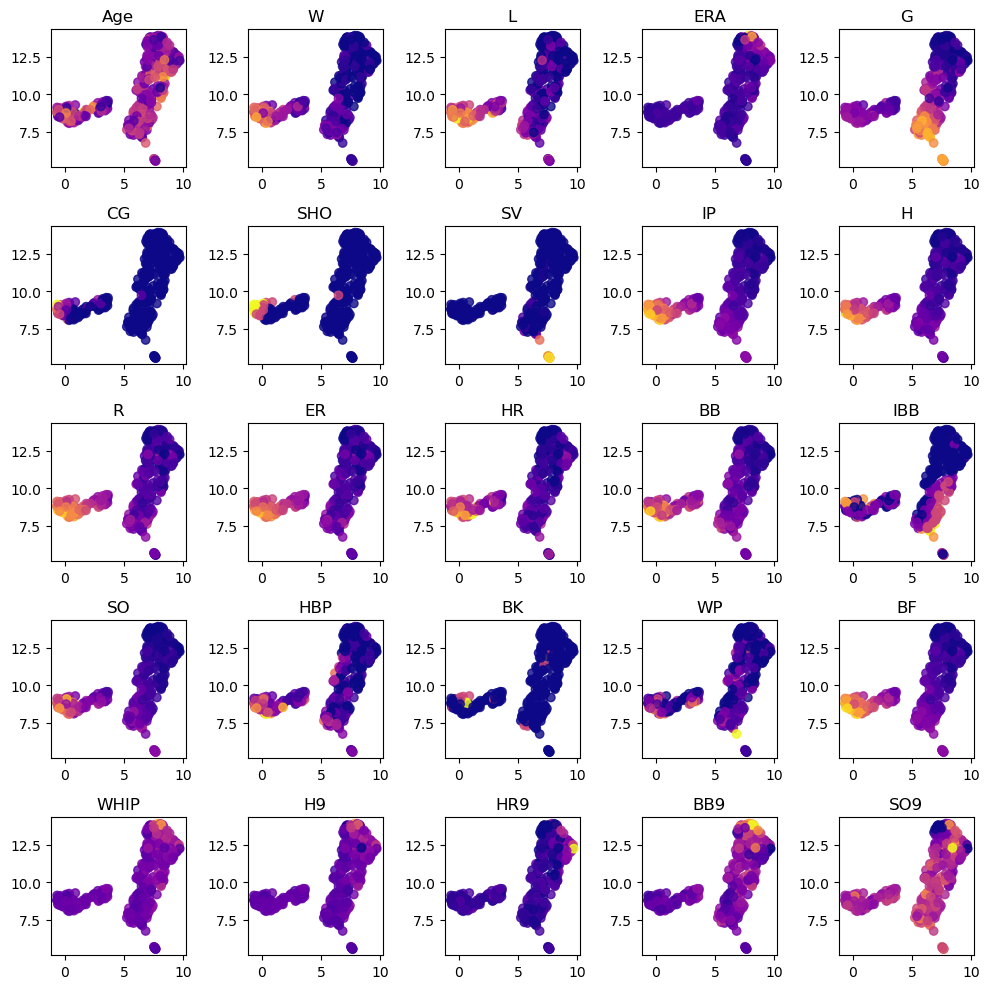

In [12]:
fig = plt.figure(figsize=(10,10))
cols = df_features.columns
for i, col in enumerate(cols):
    ax = fig.add_subplot(5, 5, i+1, title=col)
    ax.scatter(embedding[:, 0], embedding[:, 1],
        c=df_features[col], cmap='plasma', alpha=0.8)
fig.tight_layout()
plt.show()

We can find

- Plots in the leftmost island have more wins (W), losses (L), and innings pitched (IP)
- Plots around the bottom right have more plate appearances (G) and intentional base on balls (IBB)
- Plots around the upper right have higher ERA (earned run average) and BB/9.

etc. 

The above is still "qualitative," so let's analyze "quantitatively."

### Quantitative evaluation using Volcano plot

For quantitative evaluation, let's use the evaluation and visualization method called the **Volcano plot**.

Volcano plot visualizes

- **Fold change** of the mean values between the target cluster and the others
- Whether the difference is **statistically significant** or not

Generally, the horizontal axis is log2 of the fold change, and the vertical axis is -log10 of the p-value. 

Here, you find the infamous statistic: p-value. And the analysis is a typical multiple comparison. Therefore, the p-value must be corrected using correction methods such as the [Benjamini-Hochberg (BH) method](https://en.wikipedia.org/wiki/False_discovery_rate). (The corrected p-value is sometimes called "q-value.")

Let's write entire codes to clarify how the volcano plot works. Very simple.

/var/folders/z9/h5ngrm8n1rsfc11gly4_pkj40000gn/T/ipykernel_23552/3020885340.py:47: RuntimeWarning: divide by zero encountered in log2
  ax.scatter(np.log2(fcs), -np.log10(q_values),
/var/folders/z9/h5ngrm8n1rsfc11gly4_pkj40000gn/T/ipykernel_23552/3020885340.py:51: RuntimeWarning: divide by zero encountered in log2
  max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
/var/folders/z9/h5ngrm8n1rsfc11gly4_pkj40000gn/T/ipykernel_23552/3020885340.py:62: RuntimeWarning: divide by zero encountered in log2
  ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)


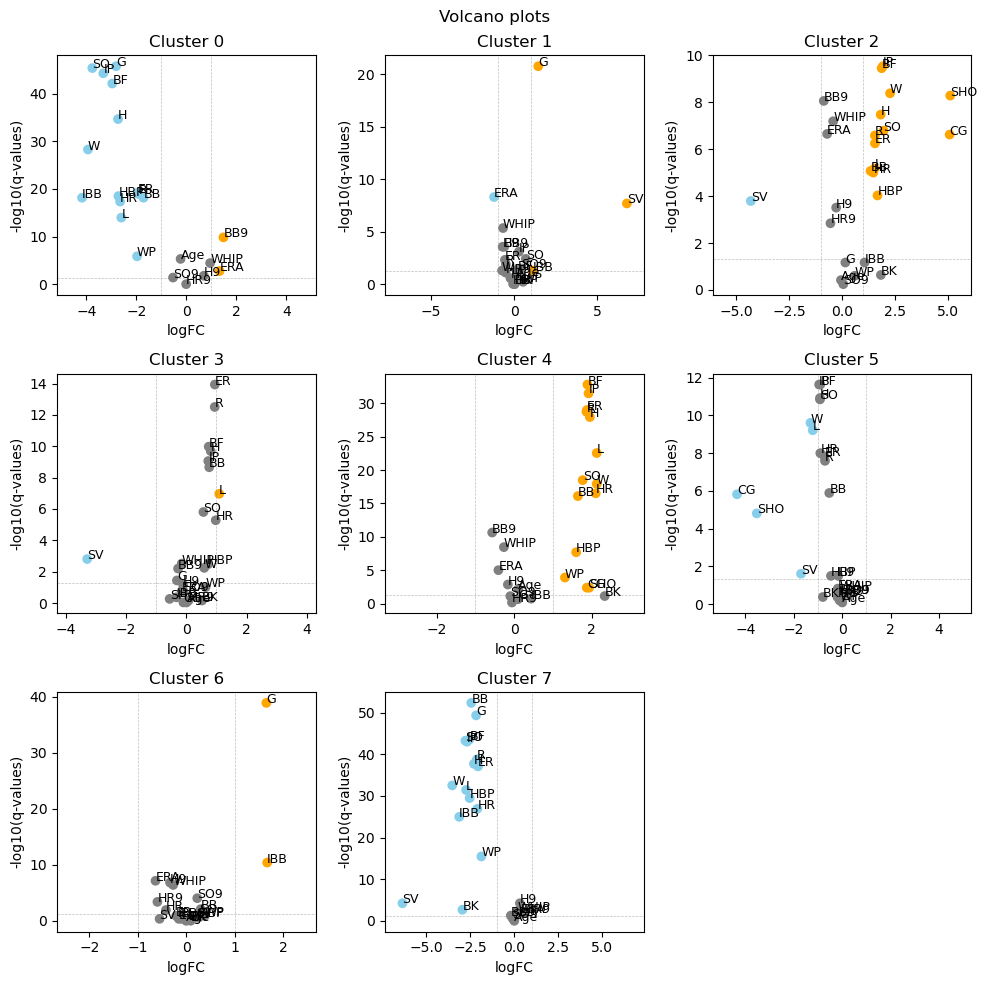

In [13]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = df_features.copy()
df_features_with_clusters['cluster'] = clusters
cols = df_features.columns

# Threshold. q < 0.05 and Fold change (fc) > 2 or < 0.5 is significant
q_threshold = 0.05
fc_threshold = 2

fig = plt.figure(figsize=(10,10))
# For each cluster
for i in range(k):
    p_values = []
    fcs = []
    # one plot = one variable
    for col in cols:
        # hypothesis test
        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)
        
        # Fold change
        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)

    # p-value　correction
    q_values = multipletests(p_values, method='fdr_bh')[1]

    # Different colors are given when plots over threshold 
    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):
        # If fc > 2: orange
        if q_value < q_threshold and fc > fc_threshold:
            colors.append('orange')
        # If fc < 0.5: blue
        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('skyblue')
        # No difference: gray
        else:
            colors.append('gray')

    ax = fig.add_subplot(3,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)
    
    # Tricks to create beautiful plots
    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1]) # To handle -inf.
    ax.set_ylim(ax.get_ylim())
    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)

    # label and annotation
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()


The result indicates

- **Orange dots = significantly larger in the target cluster** compared to the other clusters
- **Light blue dots = significantly smaller in the target cluster** compared to the other clusters

Although there are only a few plots in each image in this tutorial, when data with hundreds or thousands of explanatory variables are visualized using this method, it looks like an erupting volcano; hence this visualization method is named "volcano" plot.

The characteristics that can be identified from the result are

- Cluster 0: Most variables are lower, but ERA and BB9 are higher
- Cluster 1: More saves (SV)
- Cluster 2: More shutouts (SHO) and complete games (CG)
- Cluster 3: More losses (L) and fewer saves
- Cluster 4: Similar to Cluster 2, with more innings pitched (IP), wins (W), and losses (W). On the other hand, no significance in shutouts or complete games.
- Cluster 5: No significantly higher variables. Fewer shutouts, complete games, saves, wins, and losses.
- Cluster 6: More plate appearances (G) and IBBs.
- Cluster 7: Fewer plate appearances and other variables than the other clusters.

like that.


## Discussion and annotation

Finally, let's discuss the results using domain knowledge, here, baseball knowledge.

We can give the following annotation for each cluster based on the results above.

- Cluster 0: **Pitchers whose level is not enough for the first team**
- Cluster 1: **Closers**
- Cluster 2: **Aces**
- Cluster 3: **Starters not in the rotation**
- Cluster 4: **Starters in the rotation**
- Cluster 5: **Relievers**
- Cluster 6: **Setup pitchers**
- Cluster 7: **Pitchers aiming to establish themselves in the first team**

These annotations are given on the UMAP plot.

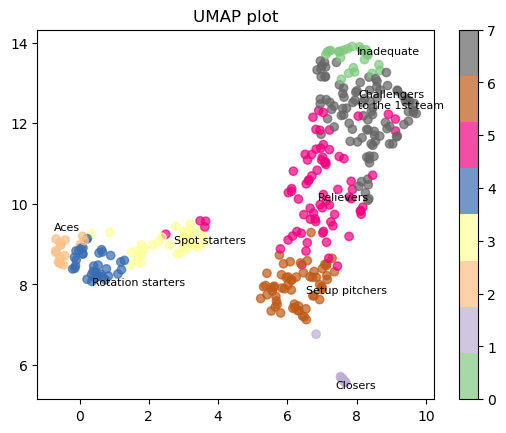

In [14]:
cluster_centers = mapper.transform(kmeanModel.cluster_centers_)
cluster_names = ['Inadequate', 'Closers', 'Aces', 'Spot starters', 'Rotation starters', 'Relievers', 'Setup pitchers', 'Challengers\nto the 1st team']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='Accent', alpha=0.7)
plt.title('UMAP plot')
for i, label in enumerate(cluster_names):
    plt.annotate(label, cluster_centers[i], size=8)
plt.colorbar()
plt.show()

Let's show the annotation in another way.

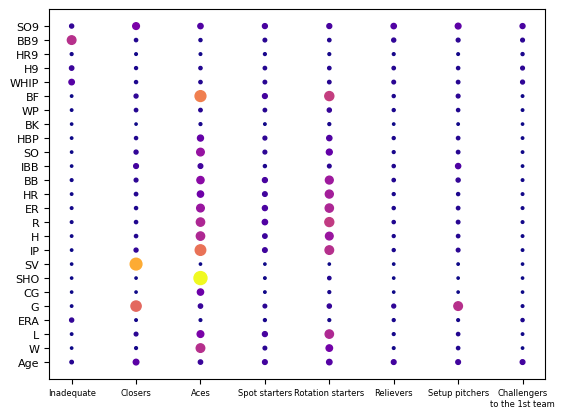

In [15]:
df_features_mm_clusters = df_features_mm.copy()
df_features_mm_clusters['cluster'] = clusters
x = []
y = []
targets = []
colors = []
for i, col in enumerate(cols):
    for j, cluster_name in enumerate(cluster_names):
        target_value = df_features_mm_clusters[df_features_mm_clusters['cluster']==j][col].mean()
        x.append(j)
        y.append(i)
        targets.append(np.exp(1+target_value*4)) # このあたりは見ながら調整
plt.scatter(x, y, s=targets, c=targets, cmap='plasma')
plt.xticks(list(range(k)), cluster_names, fontsize=6)
plt.yticks(list(range(len(cols))), cols, fontsize=8)
plt.show()

The larger the circle, the larger its explanatory variable in that cluster. You can find that the cluster names we gave seem to capture the characteristics well.

Practically, you may first create this diagram before annotation and then give names to the clusters. For example, "Cluster 1 is the SV type," or "Cluster 2 is the SHO type."

Also, in this tutorial, all explanatory variables are shown, but in practice, **you can select only some variables you are interested in**.

Finally, let's check the players in the clusters.

In [16]:
df_with_clusters = df_dropped.copy()
df_with_clusters['cluster'] = clusters
df_target_cluster = df_with_clusters[df_with_clusters['cluster'] == 2]
# df_target_cluster[df_target_cluster['Team'] == 'YakultSwallows']
df_target_cluster

,Name,Age,W,L,ERA,G,CG,SHO,SV,IP,...,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,Team,cluster
11,Hiroya Miyagi*,20,11,8,3.16,24,2,1,0,148.1,...,0,0,612,1.126,8.3,0.7,1.8,7.7,OrixBuffaloes,2
25,Yoshinobu Yamamoto,23,15,5,1.68,26,4,2,0,193.0,...,0,0,747,0.927,6.4,0.3,2.0,9.6,OrixBuffaloes,2
7,Shota Imanaga*,28,11,4,2.26,21,3,2,0,143.2,...,0,3,560,0.940,6.6,0.9,1.8,8.3,YokohamaBayStars,2
7,Hiromi Itoh,24,10,9,2.95,26,2,2,1,155.2,...,0,5,653,1.214,8.1,0.3,2.8,6.5,HokkaidoNipponHamFighters,2
10,Takayuki Katoh*,30,8,7,2.01,22,3,2,0,147.2,...,0,0,564,0.914,7.6,0.5,0.7,6.0,HokkaidoNipponHamFighters,2
24,Keiji Takahashi*,25,8,2,2.63,17,2,1,0,102.2,...,0,1,416,1.091,6.6,0.8,3.2,9.9,YakultSwallows,2
15,Masato Morishita,24,10,8,3.17,27,3,2,0,178.2,...,1,3,764,1.338,9.8,0.7,2.2,6.7,HiroshimaCarp,2
20,Daichi Ohsera,31,8,9,4.72,23,3,2,0,135.1,...,0,0,583,1.352,10.4,1.2,1.8,6.5,HiroshimaCarp,2
16,Tomohisa Ohzeki*,24,7,6,2.93,21,2,2,0,101.1,...,1,1,409,1.145,7.8,0.7,2.5,6.2,FukuokaSoftbankHawks,2
13,Yudai Ohno*,33,8,8,2.46,23,4,2,0,157.0,...,0,1,625,1.038,7.2,0.4,2.1,6.2,ChunichiDragons,2


Ace-class pitchers were classified as Cluster 2. Looks good!

## Conclusions and Discussion

I have introduced an example of clustering, a typical example of unsupervised learning, followed by visualization, analysis, and interpretation.

I would like to suggest further analysis from what I have described here.

First, through this kind of analysis, we can **get ideas about what kind of additional data we want**. For example, I feel that the cluster named "Relievers" is rather broad and would like to categorize the pitchers in it in more detail. (As you may have noticed, the data does not include hold points.)

Also, **looking at the data in three dimensions** can sometimes provide new insight. For example, if we add an age axis to the UMAP plot, we may be able to find "candidates of next ace."

It would also be exciting **to plot several years of data together**. Then, **by tracking how the same pitcher is plotted**, we may be able to **find some "typical career patterns"** and make **a prediction** such as *"The standing of this young player shifts as the pattern 2, so his next year standing will be like this"*.

And what would be the most powerful application is **pseudotime analysis**.    

The UMAP plot shows the **continuous change** of pitching standings from low to high from the top right to the bottom left (top left to bottom right in t-SNE). Furthermore, there is **branching depending on whether the pitchers are a starter or closer type**.  

If the data is not the baseball but the purchase history, we may be able to interpret the result like, for example, *the users recently registered are localized on the upper right*, *they progress to the lower left when becoming heavy users*, and *their courses are divided into left or bottom depending on the type of items they purchase*. It means that **the differences among users can be interpreted as a pseudo-chronological change**.

![](https://storage.googleapis.com/zenn-user-upload/3104c6826868-20221212.png)
(Left: UMAP, Right: t-SNE plot. Arrows indicate the direction of pseudo-chronoligical changes)

Once data is interpreted this way, we can make business actions such as **"This cluster is immature stage of that cluster." "If so, people in this cluster will buy this kind of items." "Let's offer them discount coupons!"** 

The clustering method has a high potential not only for **data classification** but also for representing **continuous transitions of populational identities** and sometimes **pseudotime relationships**.

I hope you enjoyed this tutorial and will find suitable clustering applications for your own data!